# MNIST Data

In this exercise, some data preprocessing steps are prepared (look it through so you understand it). Thereafter you will create two models. As always, the documentation is the place to go if you need to deepen your understanding or find out how to do something. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Vi definierar en funktion för att visualisera våra *confusion matrices* senare.

In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

Vi hämtar MNIST-datasetet och kollar dess beskrivning.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"]

In [4]:
from IPython.display import Markdown
display(Markdown(mnist.DESCR))

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  

With some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.  

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.

Downloaded from openml.org.

In [5]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [6]:
# The first label ("true answer") is 5. 
y[0]

'5'

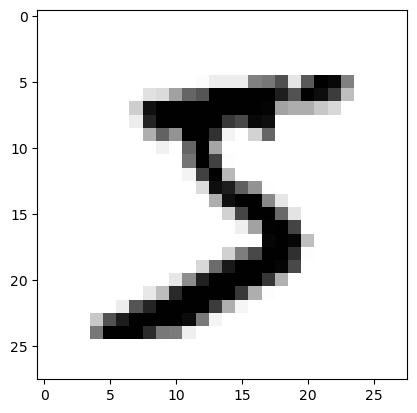

In [7]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.get_cmap("binary"))
# plt.axis("off")

In [8]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


# Creating a simple modell and evaluating it on the validation set

1. Create a linear support vector classifier model (random_state=42 is just used so we get same results due to the training algorithm beeing stochastic.):
```python
lin_clf = LinearSVC(random_state=42)
```

2. Fit the model on the scaled training data. **You might get an warning, ignore it.**
3. Predict the scaled validation data. 
4. Compute accuracy score, use the imported functionality: 
```python
from sklearn.metrics import accuracy_score
```
5. Visualize the confusion matrix, use the function we created: 
```python
def display_confusion_matrix
```

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_val_pred = lin_clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")   

c:\Users\46733\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.8440


c:\Users\46733\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


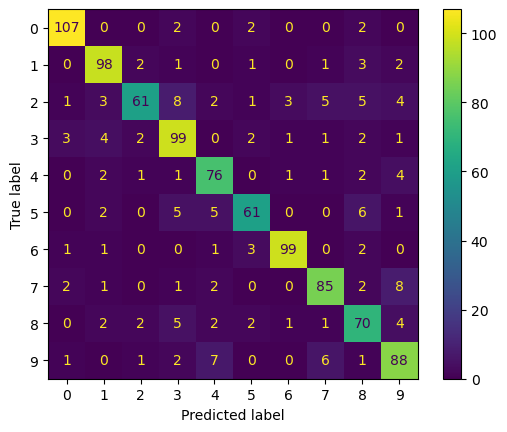

In [10]:
display_confusion_matrix(y_val, y_val_pred)


# Modell Selection with Gridsearch
## Doing GridSearch (Takes a while to run) - remove the comments if you want to run the code

1. Create an instance of a general (not linear) SVC model. 
```python
svm_clf = SVC()
```
2. Specify a hyperparameter grid:
```python
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
```
3. Use GridSearchCV and fit the model with the hyperparameter grid above **(note, fitting the model with grid_search takes a while)**.
4. If you for instance called your fine-tuned model in the step above for "gs_svm", then you can run this code:
```python
pd.DataFrame(gs_svm.cv_results_)
```
to analyze the grid search results. 

5. Predict the scaled validation data, compute the accuracy score, visualize the confusion matrix. 


6. Which model is better, the linear created above or this one where we used GridSearch?

In [ ]:
svm_clf = SVC()


hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]



In [13]:
gs_svm = GridSearchCV(svm_clf, hyper_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 1.5], 'gamma': [1, 2],
                          'kernel': ['rbf', 'poly']}],
             scoring='accuracy', verbose=2)

In [14]:
pd.DataFrame(gs_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,47.567509,3.591982,7.113569,0.594864,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
1,18.440849,1.607279,3.001680,0.260545,0.5,1,poly,"{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
2,42.873871,3.778146,6.990320,0.237465,0.5,2,rbf,"{'C': 0.5, 'gamma': 2, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
3,18.672794,3.728702,2.738505,0.222703,0.5,2,poly,"{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
4,44.879279,2.560148,7.065447,0.219290,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
5,19.750747,2.094873,2.787769,0.258309,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
6,47.106408,1.109289,7.398655,0.583844,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
7,17.599375,2.106645,2.758089,0.156954,1,2,poly,"{'C': 1, 'gamma': 2, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
8,45.080469,1.282213,6.868042,0.402530,1.5,1,rbf,"{'C': 1.5, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
9,17.971640,2.304469,2.872072,0.320623,1.5,1,poly,"{'C': 1.5, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1


# Model Evaluation on Test Data
Use the best model for evaluation on test data. 

SVC(C=0.5, gamma=1, kernel='poly')
Optimized SVM Accuracy: 0.94


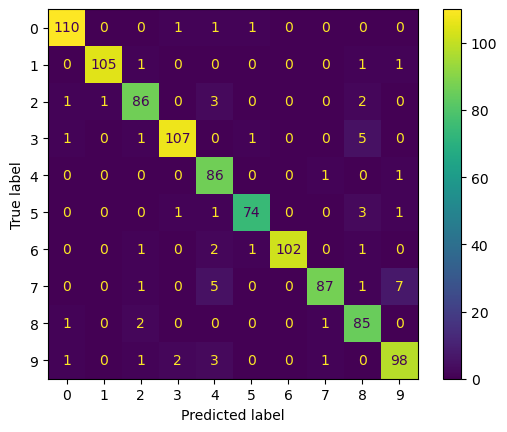

In [ ]:
# Get best model from GridSearch
best_svm = gs_svm.best_estimator_

# Predict validation data
y_pred_svm = best_svm.predict(X_val_scaled)

# Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"Optimized SVM Accuracy: {accuracy_svm}")

# Visualize confusion matrix
display_confusion_matrix(y_val, y_pred_svm)